# Reproducibility of Enhancement of E-Learning Student’s Performance Based on Ensemble Techniques by Abdulkream A. Alsulami, Abdullah S. AL-Malaise AL-Ghamdi, & Mahmoud Ragab (2023, Electronics)


Author: Amy Tan (amyjxtan@gmail.com)

Date: 11/30/2024

## Introduction

The original paper, ["Enhancement of E-Learning Student’s Performance Based on Ensemble Techniques"](https://github.com/ucsd-psych201a/alsulami2023/blob/main/original_paper/Enhancement_of_ELearning_Students_Performance_Based_on_Ensemble_Techniques.pdf), aimed to improve educational data mining, or EDM, specifically in regards to electronic learning (e-learning) since the COVID-19 pandemic saw a surge in E-learning programs. EDM involves developing methods to deal with the different types of data in educational systems to improve students’ learning outcomes. In particular, the researchers sought to predict student performance using decision trees, naive Bayes, and random forests, enhancing the accuracy further through bagging and boosting, using voting to assist when necessary. **Researchers ultimately concluded that most accurate model methods used decision trees, coupled with boosting, resulting in an accuracy of 0.77.**

In my project, I mainly sought to reproduce this particular finding. However, I also reproduced the rest of their results in regards to precision, recall, f-measure, and their visualizations in Python.

- All work related to this project is available in its [project repository](https://github.com/ucsd-psych201a/alsulami2023/tree/main).
- [OSF Preregistration](https://osf.io/zvapf)


## Methods
### Materials

#### The Data

The dataset used in this project (provided in the data folder in `xAPI-Edu-Data.csv`, and also available on [Kaggle](https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data)) is the exact one used in the original paper. It was "obtained from the Kalboard 360 E-Learning system via the Experience API (XAPI). The data set in this study consists of 480 records with 17 attributes." All attributes are either integer or categorical and are generally categorized into three major attribute types: demographic, academic, and behavioral. Since the authors had already performed some cleaning of the data, I did not find any reasons not to run the models, and perform analysis on all 480 students.

### Procedure

"First, we collect the data set and prepare it to perform the study. Then, three traditional data mining methods will apply (decision tree (DT), naïve Bayes (NB), and random forest (RF)) to produce a performance model. In addition to the classifiers mentioned earlier, two ensemble methods are used to improve their performance. Boosting, as well as bagging, is applied to enhance the student prediction model’s success. Two and three methods were added to each ensemble technique using the voting process for a more accurate prediction. The model’s last phase will involve evaluating and discussing the results. The data were divided into training and test sets. Each prediction model’s performance was evaluated using K-fold cross-validation. When testing a model, this technique is used to solve the variance problem. In brief, k-fold cross-validation divides the training set into 10 folds. During training, 9 folds are applied before the final fold is tested. As an average of the different accuracies is taken, this better represents the model performance. The method was repeated ten times. All models were run with the WEKA software’s default parameters." My analysis only differs in that the models will be built and run in Python.

### Analysis Plan

#### Data Cleaning

"As part of preprocessing, data cleaning is essential for removing irrelevant objects and missing values in the data collection. There are zero missing values in the data set." Though the authors do not specifically mention this, I cleaned the data set with specific regard to the `NationalITy`, `PlaceofBirth`, and `StageID` columns to ensure that column contents were consistent in their usage of capitalization and abbreviations (or lack thereof). As previously noted, I did not exclude any of the data from the provided data set.


#### Data Mining Tool and Model Creation

I used these to create a decision tree (DT), naïve Bayes (NB), and random forest (RF) classifiers. However, as previously mentioned, my project will not use WEKA, but Python. I anticipated using [skit-learn](https://scikit-learn.org/stable/) to accomplish building and testing these models. Following that, I applied boosting and bagging to all the models to test potential improvements.

#### Measurement Measures

"Different DM techniques were compared to determine which had higher prediction accuracy than others, and a decision was made based on that. The following common metrics can evaluate a study’s performance: accuracy, precision, recall, and F-Measure." Thus, my project also examined all four measurements of accuracy to see if I could reproduce a similar finding that **decision trees with boosting had the highest accuracy of 0.77**. The following includes how the authors calculated each of the measurements, for which I followed suit, using `skit-learn`'s built in tools to compute the them.


##### Accuracy

"This represents the classifier’s accuracy and relates to the classifier’s capacity. The accuracy of a predictor relates to the way it accurately predicts the impact of a predicted feature for new information. The percentage of correct predictions divided by the total number of predictions yields the accuracy. It is calculated with the following Equation (3):

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

where: 
- True positives ($TP$): cases that are predicted as yes. 
- True negatives ($TN$): cases that are predicted as no. 
- False positives ($FP$): cases that are predicted yes and are actually yes. 
- False negatives ($FN$): cases that are predicted as no but are actually yes.

##### Precision

Precision is calculated as the ratio of correctly classified positive predictions to total positive predictions, whether correctly or incorrectly classified. It is calculated with Equation (4).

$$Precision = \frac{TP}{TP + FP}$$

##### Recall

The recall is determined by calculating the proportion of correctly classified positive predictions to all positive predictions. It is calculated with Equation (5).

$$Recall = \frac{TP}{TP + FN}$$

##### F-Measure

F-measure conveys both recall and precision in a single measure. It is calculated with Equation (6)."

$$ F1 − measure = (2 ∗ Recall ∗ Precision)/(Recall + Precision)$$

### Differences from Original Study

To iterate, a key difference between this reproducibility project and the original paper are the computational tools used. The original paper used [WEKA](https://www.weka.io/) to visualize and perform machine learning/ensemble methods, whereas my project will use Python. Anticipated packages include [matplotlib](https://matplotlib.org/) and [skit-learn](https://scikit-learn.org/stable/). Additionally, I plan to clean the data using [pandas](https://pandas.pydata.org/) to ensure that entries are consistent, but I do not anticipate any changes I made to make a difference in the findings.

### Methods Addendum (Post Data Collection)

#### Differences from pre-data collection methods plan

In addition to the cleaning described above in the Data Cleaning section, I had to create a variety of functions to transform colummns that contained categorical data into numerical data. After doing so, I applied these functions, storing the new data set under the variable `edu_dummy`. The full dictionary of original to transformed values can be found further below and in the `README.md` file in the GitHub repository. The authors made no mention if the WEKA software cleaned the data in a similar manner, but it was necessary for me to run the classifer models in Python. 

Another difference was that the methodology of the original paper states that one experiment was "boosting with naïve Bayes and random forest". However, subsequent tables with results demonstrate the researchers actually used boosting with naïve Bayes and decision trees. Thus, it is worth noting that I decided to deviate from the initially stated methodology to to run boosting with naïve Bayes. The impacts of this are discussed further in the commentary section.


## Results

### Data preparation

In [59]:
# Load Relevant Libraries and Functions

import pandas as pd # Cleaning data
import matplotlib.pyplot as plt # Creating and plotting figures/data
import matplotlib.image as mpimg # Creating and plotting figures/data

# To create models
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

In [1]:
# Import data
edu = pd.read_csv('../data/xAPI-Edu-Data.csv')

# Clean dataset column names 
edu.columns = edu.columns.str.title()

# Clean Placeofbirth column to clean random capitalization
edu["Placeofbirth"] = edu["Placeofbirth"].str.title()

# Clean Stageid column to clean random capitalization
edu["Stageid"] = edu["Stageid"].str.lower()

# Function for KW abbrevations into Kuwait for entry consistency in Nationality column
def kuwait (string):
    """
    Replaces 'KW' with 'Kuwait'.
    
    Parameters:
    string = a string
    
    Returns:
    'Kuwait'
    """
    if string == 'KW':
        return 'Kuwait'
    else:
        return string 
    
# Apply function kuwait to Nationality column
edu['Nationality'] = edu['Nationality'].apply(kuwait).str.title()

# Double check that all cleaning was correct:
edu.head()

,Gender,Nationality,Placeofbirth,Stageid,Gradeid,Sectionid,Topic,Semester,Relation,Raisedhands,Visitedresources,Announcementsview,Discussion,Parentansweringsurvey,Parentschoolsatisfaction,Studentabsencedays,Class
0,M,Kuwait,Kuwait,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,Kuwait,Kuwait,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,Kuwait,Kuwait,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,Kuwait,Kuwait,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,Kuwait,Kuwait,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


From here, I'm essentially creating a number of functions to change my categorical variables into numerical values in order to fit the following DM/ML models.

The following table shows how each categorical variable was changed into a numerical value:

| **Column**               | **Category** | **Numerical Representation** |
|:-------------------------|:-------------|:-----------------------------|
| Gender                   | Male         | 0                            |
|                          | Female       | 1                            |
| Nationality              | Kuwait       | 0                            |
|                          | Lebanon      | 1                            |
|                          | Egypt        | 2                            |
|                          | Saudiarabia  | 3                            |
|                          | Usa          | 4                            |
|                          | Jordan       | 5                            |
|                          | Venzuela     | 6                            |
|                          | Iran         | 7                            |
|                          | Tunis        | 8                            |
|                          | Morocco      | 9                            |
|                          | Syria        | 10                           |
|                          | Palestine    | 11                           |
|                          | Iraq         | 12                           |
|                          | Lybia        | 13                           |
| Stageid                  | lowerlevel   | 0                            |
|                          | middleschool | 1                            |
|                          | highschool   | 2                            |
| Gradeid                  | G-02         | 2                            |
|                          | G-04         | 4                            |
|                          | G-05         | 5                            |
|                          | G-06         | 6                            |
|                          | G-07         | 7                            |
|                          | G-08         | 8                            |
|                          | G-09         | 9                            |
|                          | G-10         | 10                           |
|                          | G-11         | 11                           |
|                          | G-12         | 12                           |
| Sectionid                | A            | 0                            |
|                          | B            | 1                            |
|                          | C            | 2                            |
| Topic                    | IT           | 0                            |
|                          | Math         | 1                            |
|                          | Arabic       | 2                            |
|                          | Science      | 3                            |
|                          | English      | 4                            |
|                          | Quran        | 5                            |
|                          | Spanish      | 6                            |
|                          | French       | 7                            |
|                          | History      | 8                            |
|                          | Biology      | 9                            |
|                          | Chemistry    | 10                           |
|                          | Geology      | 11                           |
| Semester                 | F            | 0                            |
|                          | S            | 1                            |
| Relation                 | Father       | 0                            |
|                          | Mum          | 1                            |
| Parentansweringsurvey    | No           | 0                            |
|                          | Yes          | 1                            |
| Parentschoolsatisfaction | Bad          | 0                            |
|                          | Good         | 1                            |
| Studentabsencedays       | Under-7      | 0                            |
|                          | Above-7      | 1                            |
| Class                    | M            | 0                            |
|                          | L            | 1                            |
|                          | H            | 2                            |

In [2]:
# Function for Gender column
def dummy_gender(string):
    """
    Replaces 'M' with 0 and 'F' with 1.
    
    Parameters:
    string = a string, either 'M' or 'F'
    
    Returns:
    0 or 1
    """
    
    if string == 'M':
        return 0
    elif string == 'F':
        return 1

# Creating a dictionary to reference countries to an integer, numerical value
countries = {'Kuwait': 0, 'Lebanon': 1,  'Egypt': 2, 'Saudiarabia': 3, 'Usa': 4, 'Jordan': 5,
       'Venzuela': 6, 'Iran': 7, 'Tunis': 8, 'Morocco': 9, 'Syria': 10, 'Palestine': 11,
       'Iraq': 12, 'Lybia': 13}

# Function for Nationality column
def dummy_country(string):
    """
    Takes a given country and returns its respective integer.
    
    Parameters:
    string = a string, one of the countries contained in the countries dictionary
    
    Returns:
    An integer
    """
    
    return countries[string]
    
# Function for Stageid column
def dummy_stageid(string):
    """
    Takes a given schooling level and returns its respective integer.
    
    Parameters: 
    string = a string, a schooling level (stage id)
    
    Returns:
    An integer
    """
    
    if string == 'lowerlevel':
        return 0
    elif string == 'middleschool':
        return 1
    elif string == 'highschool':
        return 2
        
# Creating a dictionary to reference grade levels to an integer, numerical value
grade = {'G-04': 4, 'G-07': 7, 'G-08': 8, 'G-06': 6, 'G-05': 5, 'G-09': 9, 'G-12': 12, 'G-11': 11,
       'G-10': 10, 'G-02': 2}

# Function for Gradeid
def dummy_gradeid(string):
    """
    Takes a given grade level and returns its respective integer.
    
    Parameters: 
    string = a string, a grade level (grade id)
    
    Returns:
    An integer
    """
    
    return grade[string]

# Function for Sectionid column
def dummy_sectionid(string):
    """
    Takes a given section id and returns its respective integer.
    
    Parameters: 
    string = a string, a section
    
    Returns:
    An integer
    """
    
    if string == 'A':
        return 0
    elif string == 'B':
        return 1
    elif string == 'C':
        return 2
    
# Creating a dictionary to reference topics levels to an integer, numerical value
topics = {'IT': 0, 'Math': 1, 'Arabic': 2, 'Science': 3, 'English': 4, 'Quran': 5, 'Spanish': 6,
       'French': 7, 'History': 8, 'Biology': 9, 'Chemistry': 10, 'Geology': 11}

# Function for Topic column
def dummy_topic(string):
    """
    Takes a given topic and returns its respective integer.
    
    Parameters: 
    string = a string, a topic
    
    Returns:
    An integer
    """
    
    return topics[string]

# Function for Semester column
def dummy_semester(string):
    """
    Takes a given semester and returns its respective integer.
    
    Parameters: 
    string = a string, a topic
    
    Returns:
    An integer
    """
    
    if string == 'F':
        return 0
    elif string == 'S':
        return 1

# Function for Relation column
def dummy_relation(string):
    """
    Replaces 'Father' with 0 and 'Mum' with 1.
    
    Parameters:
    string = a string
    
    Returns:
    0 or 1
    """
    
    if string == 'Father':
        return 0
    elif string == 'Mum':
        return 1
    
# Function for Parentansweringsurvey column
def dummy_survey(string):
    """
    Replaces 'No' with 0 and 'Yes' with 1.
    
    Parameters:
    string = a string
    
    Returns:
    0 or 1
    """
    
    if string == 'No':
        return 0
    elif string == 'Yes':
        return 1
    
# Function for Parentschoolsatisfaction column
def dummy_satisfaction(string):
    """
    Replaces 'Bad' with 0 and 'Good' with 1.
    
    Parameters:
    string = a string
    
    Returns:
    0 or 1
    """
    
    if string == 'Bad':
        return 0
    elif string == 'Good':
        return 1
 

 # Function for Studentabsencedays column
def dummy_absences(string):
    """
    Replaces 'Under-7' with 0 and 'Above-7' with 1.
    
    Parameters:
    string = a string
    
    Returns:
    0 or 1
    """
    
    if string == 'Under-7':
        return 0
    elif string == 'Above-7':
        return 1
    
# Function for Class column
def dummy_class(string):
    """
    Takes a given class and returns its respective integer.
    
    Parameters: 
    string = a string, a class
    
    Returns:
    An integer
    """
    
    if string == 'M':
        return 0
    elif string == 'L':
        return 1
    elif string == 'H':
        return 2

In [3]:
# Create a new dataset to store all changes
edu_dummy = edu

# Apply all previously defined functions to their respective columns
edu_dummy['Gender'] = edu_dummy['Gender'].apply(dummy_gender)
edu_dummy['Nationality'] = edu_dummy['Nationality'].apply(dummy_country)
edu_dummy['Placeofbirth'] = edu_dummy['Placeofbirth'].apply(dummy_country)
edu_dummy['Stageid'] = edu_dummy['Stageid'].apply(dummy_stageid)
edu_dummy['Gradeid'] = edu_dummy['Gradeid'].apply(dummy_gradeid)
edu_dummy['Sectionid'] = edu_dummy['Sectionid'].apply(dummy_sectionid)
edu_dummy['Topic'] = edu_dummy['Topic'].apply(dummy_topic)
edu_dummy['Semester'] = edu_dummy['Semester'].apply(dummy_semester)
edu_dummy['Relation'] = edu_dummy['Relation'].apply(dummy_relation)
edu_dummy['Parentansweringsurvey'] = edu_dummy['Parentansweringsurvey'].apply(dummy_survey)
edu_dummy['Parentschoolsatisfaction'] = edu_dummy['Parentschoolsatisfaction'].apply(dummy_satisfaction)
edu_dummy['Studentabsencedays'] = edu_dummy['Studentabsencedays'].apply(dummy_absences)
edu_dummy['Class'] = edu_dummy['Class'].apply(dummy_class)

In [62]:
# Confirm that all functions were correctly applied:
edu_dummy.head()

,Gender,Nationality,Placeofbirth,Stageid,Gradeid,Sectionid,Topic,Semester,Relation,Raisedhands,Visitedresources,Announcementsview,Discussion,Parentansweringsurvey,Parentschoolsatisfaction,Studentabsencedays,Class
0,0,0,0,0,4,0,0,0,0,15,16,2,20,1,1,0,0
1,0,0,0,0,4,0,0,0,0,20,20,3,25,1,1,0,0
2,0,0,0,0,4,0,0,0,0,10,7,0,30,0,0,1,1
3,0,0,0,0,4,0,0,0,0,30,25,5,35,0,0,1,1
4,0,0,0,0,4,0,0,0,0,40,50,12,50,0,0,1,0


---

## Confirmatory analysis

### Traditional DM techniques


I first began by running a decision tree, naive bayes, and random forest alone. Note, for all of the following models and analyses, I used a `random_state` of 12345 for the 10-fold cross-validation to document my work and ensure reproducibility.

The variable `results` stores each model's metrics with the model name (as a string) as the key, and a list as the value where index 0: accuracy, 1: precision, 2: recall, 3: f-measure.


In [5]:
# Define Y as what we're trying to classify
Y = edu_dummy['Class']

# Define X as our predictors (all columns besides 'Class')
X = edu_dummy.drop('Class',axis=1)

# Set up 10-fold cross-validation with 10 repetitions
rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=12345)

# empty dictionary to store each model's metrics
results = {}

# create a function to store each model's performance metrics
def evaluate_model(model, X, Y):
    """
    Evaluates the performance of a machine learning model using cross-validation.

    Parameters:
        model: The machine learning model to evaluate. Must be compatible with scikit-learn's API.
        X: array-like or pandas DataFrame
            The feature dataset used for evaluation.
        Y: array-like or pandas Series
            The target labels corresponding to the feature dataset.

    Returns:
        metrics: list of floats
            A list containing the following evaluation metrics:
            - Accuracy (percentage)
            - Precision (weighted average)
            - Recall (weighted average)
            - F1 score (weighted average)
            Each metric is rounded to two or three decimal places for precision.
    """
    
    metrics = []
    scoring = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, average='weighted'),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1': make_scorer(f1_score, average='weighted')
    }
    
    scores = cross_validate(model, X, Y, cv=rskf, scoring=scoring)
    
    metrics = [
        round(scores['test_accuracy'].mean() * 100, 2),
        round(scores['test_precision'].mean(), 3),
        round(scores['test_recall'].mean(), 3),
        round(scores['test_f1'].mean(), 3)]
    
    return metrics

In [6]:
# Decision Tree
dt = DecisionTreeClassifier()
results['DT'] = evaluate_model(dt, X, Y)

# Naive Bayes
nb = GaussianNB()
results['NB'] = evaluate_model(nb, X, Y)

# Random Forest
rf = RandomForestClassifier()
results['RF'] = evaluate_model(rf, X, Y)

### Traditional DM techniques with Ensemble Methods

I then added on the ensemble methods the authors described, with the `results` dictionary now storing the metrics from all 15 models run.

#### Boosting

Note that boosting is not traditionally used with Naive Bayes, but for the sake of reproducing the original paper, I followed suit. Additionally, as previously mentioned, the methodology of the original paper states that one experiment was "boosting with naïve Bayes and random forest" - however; since the following tables and analysis demonstrate the researchers actually used boosting with naïve Bayes and decision trees, I decided to follow the tables.

In [8]:
# AdaBoost with Decision Tree (Boosting DT)
adaboost_dt = AdaBoostClassifier(estimator=dt, random_state=12345, algorithm='SAMME')
results['Boosting+DT'] = evaluate_model(adaboost_dt, X, Y)  

# AdaBoost with Naive Bayes (Boosting Naive Bayes)
adaboost_nb = AdaBoostClassifier(estimator=nb, random_state=12345, algorithm='SAMME')
results['Boosting+NB'] = evaluate_model(adaboost_nb, X, Y)  

# AdaBoost with Random Forest (Boosting RF)
adaboost_rf = AdaBoostClassifier(estimator=rf, random_state=12345, algorithm='SAMME')
results['Boosting+RF'] = evaluate_model(adaboost_rf, X, Y)  

# AdaBoost with Naive Bayes and Decision Tree
voting_clf = VotingClassifier(estimators=[('nb', nb), ('dt', dt)], voting='hard')
adaboost_voting = AdaBoostClassifier(estimator=voting_clf, random_state=12345, algorithm='SAMME')
results['Boosting+DT+NB'] = evaluate_model(adaboost_voting, X, Y)

# AdaBoost with Random Forest and Decision Trees 
voting_clf = VotingClassifier(estimators=[('rf', rf), ('dt', dt)], voting='hard')
adaboost_voting = AdaBoostClassifier(estimator=voting_clf, random_state=12345, algorithm='SAMME')
results['Boosting+RF+DT'] = evaluate_model(adaboost_voting, X, Y)

# Voting with AdaBoost with Decision Tree, Naive Bayes, and Random Forest
voting_clf = VotingClassifier(estimators=[('dt', dt), ('nb', nb), ('rf', rf)], voting='hard')
adaboost_voting = AdaBoostClassifier(estimator=voting_clf, random_state=12345, algorithm='SAMME')
results['Boosting+NB+RF+DT'] = evaluate_model(adaboost_voting, X, Y)

#### Bagging

In [9]:
# Bagging with Decision Tree
bagging_dt = BaggingClassifier(estimator=dt, random_state=12345)
results['Bagging+DT'] = evaluate_model(bagging_dt, X, Y)  

# Bagging with Naive Bayes
bagging_nb = BaggingClassifier(estimator=nb, random_state=12345)
results['Bagging+NB'] = evaluate_model(bagging_nb, X, Y)  

# Bagging with Random Forest
bagging_rf = BaggingClassifier(estimator=rf, random_state=12345)
results['Bagging+RF'] = evaluate_model(bagging_rf, X, Y)  

# Bagging with Naive Bayes and Decision Tree
voting_clf = VotingClassifier(estimators=[('nb', nb), ('dt', dt)], voting='hard')
bagging_voting = BaggingClassifier(estimator=voting_clf, random_state=12345)
results['Bagging+DT+NB'] = evaluate_model(bagging_voting, X, Y)

# Bagging with Random Forest and Decision Trees
voting_clf = VotingClassifier(estimators=[('rf', rf), ('dt', dt)], voting='hard')
bagging_voting = BaggingClassifier(estimator=voting_clf, random_state=12345)
results['Bagging+RF+DT'] = evaluate_model(bagging_voting, X, Y)

# Bagging with Decision Tree, Naive Bayes, and Random Forest
voting_clf = VotingClassifier(estimators=[('dt', dt), ('nb', nb), ('rf', rf)], voting='hard')
bagging_voting = BaggingClassifier(estimator=voting_clf, random_state=12345)
results['Bagging+NB+RF+DT'] = evaluate_model(bagging_voting, X, Y)

In [68]:
results

{'DT': [72.85, 0.737, 0.729, 0.727],
 'NB': [73.92, 0.749, 0.739, 0.734],
 'RF': [79.73, 0.807, 0.797, 0.796],
 'Boosting+DT': [72.81, 0.736, 0.728, 0.726],
 'Boosting+NB': [73.92, 0.749, 0.739, 0.734],
 'Boosting+RF': [79.9, 0.808, 0.799, 0.798],
 'Boosting+DT+NB': [75.23, 0.765, 0.752, 0.75],
 'Boosting+RF+DT': [77.38, 0.798, 0.774, 0.771],
 'Boosting+NB+RF+DT': [79.98, 0.806, 0.8, 0.799],
 'Bagging+DT': [76.62, 0.776, 0.766, 0.765],
 'Bagging+NB': [73.94, 0.75, 0.739, 0.735],
 'Bagging+RF': [79.38, 0.805, 0.794, 0.793],
 'Bagging+DT+NB': [76.9, 0.797, 0.769, 0.766],
 'Bagging+RF+DT': [76.56, 0.798, 0.766, 0.761],
 'Bagging+NB+RF+DT': [78.9, 0.798, 0.789, 0.788]}

---

## Results: Comparing Findings

---

### 1. Boosting and Bagging Summary Tables

#### Boosting Results 

Below is a summary table of my experiments with boosting - below that is the original authors' results of boosting.

In [11]:
# Select results from the Boosted Models only
boosting_results = {key: value for key, value in results.items() if 'Boosting' in key}

# Clean keys to remove 'Boosting+' fromt the beginning
boosting_results = {key.lstrip('Boosting+ '): value for key, value in boosting_results.items()}

df_boosting = pd.DataFrame(boosting_results, index=['Accuracy', 'Precision', 'Recall', 'F-measure'])
df_boosting = df_boosting[['DT', 'RF', 'NB', 'DT+NB', 'RF+DT', 'NB+RF+DT']]
df_boosting

,DT,RF,NB,DT+NB,RF+DT,NB+RF+DT
Accuracy,72.810,79.900,73.920,75.230,77.380,79.980
Precision,0.736,0.808,0.749,0.765,0.798,0.806
Recall,0.728,0.799,0.739,0.752,0.774,0.800
F-measure,0.726,0.798,0.734,0.750,0.771,0.799


<div style="display: flex; justify-content: space-around;">
    <img src="images/classification with boosting.png" alt="Image 1" style="width: 85%;"/> </div>

#### Bagging Results 

Below is a summary table of my experiments with bagging - below that is the original authors' results of bagging.

In [12]:
# Select results from the Bagging Models only
bagging_results = {key: value for key, value in results.items() if 'Bagging' in key}
# Clean keys to remove 'Bagging+' from the beginning
bagging_results = {key.lstrip('Bagging+ '): value for key, value in bagging_results.items()}

df_bagging = pd.DataFrame(bagging_results, index=['Accuracy', 'Precision', 'Recall', 'F-measure'])
df_bagging = df_bagging[['DT', 'RF', 'NB', 'DT+NB', 'RF+DT', 'NB+RF+DT']]
df_bagging

,DT,RF,NB,DT+NB,RF+DT,NB+RF+DT
Accuracy,76.620,79.380,73.940,76.900,76.560,78.900
Precision,0.776,0.805,0.750,0.797,0.798,0.798
Recall,0.766,0.794,0.739,0.769,0.766,0.789
F-measure,0.765,0.793,0.735,0.766,0.761,0.788


<div style="display: flex; justify-content: space-around;">
    <img src="images/classification with bagging.png" alt="Image 1" style="width: 85%;"/> </div>

---

### 2. Accuracy
After reproducing the tables I plotted their accuracies side-by-side to compare my results to those of the authors.

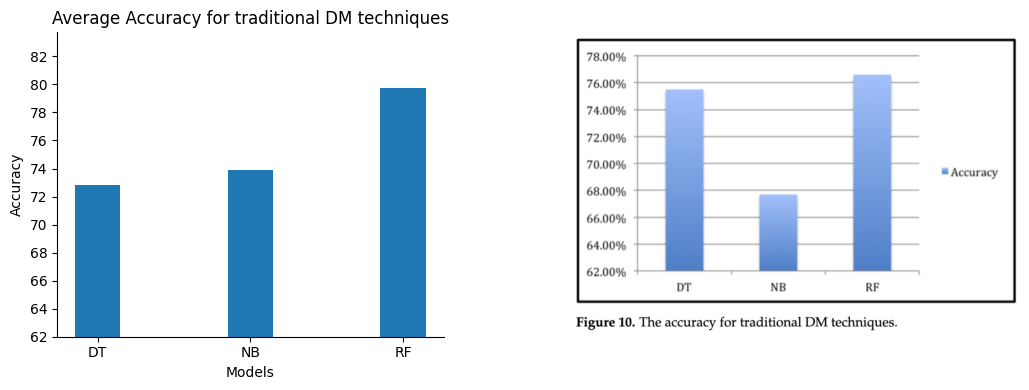

In [13]:
# Code to plot my models accuracies:
accuracies = [metrics[0] for metrics in results.values()][0:3]
models = list(results.keys())[0:3]

# Load in og figure
img = mpimg.imread('images/accuracy for traditional DM techniques.png')

# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [1, 2]})  # Increase the width of the image subplot

# Plotting the bar chart
ax[0].bar(models, accuracies, width=0.3)
ax[0].set_ylim(62.00)
ax[0].set_yticks(range(62, int(max(accuracies) + 4), 2))
ax[0].set_title('Average Accuracy for traditional DM techniques')
ax[0].set_xlabel('Models')
ax[0].set_ylabel('Accuracy')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# Display the image on the second subplot
ax[1].imshow(img)
ax[1].axis('off')  # Hide the axis for the image

# Adjust layout to prevent overlap
plt.tight_layout()

The original findings are plotted on the right, while mine are on the left.

The authors found that "the accuracy values were above 65%. We observed that naïve Bayes had the lowest accuracy of 67.7% among all methods." While I was able to reproduce their above 65% accuracy (with all of my models performing above 72% accuracy), I instead observed that boosting with a decision tree (DT) had the lowest accuracy (72.81%)

As evidenced in the plots, the results I obtained are different from the original paper - the original authors found that random forests (RF) performed best (76.6%), followed closely by decision trees (DT) (75.5%), with naive bayes (NB) performing the worst (67.7%). However, while I still found random forests to perform the best (79.81%), they were followed by naive bayes (73.92%) with decision trees performing the worst (73.1%).

Additionally, the authors concluded that their proposed model (decision trees with boosting) "enhanced the accuracy effectively when we used ensemble methods with the traditional data mining separately (boosting + DT) and when we combined several classifiers (Boosting + DT + RF) using the voting process." They included the following figure below (right side) to illustrate this point.

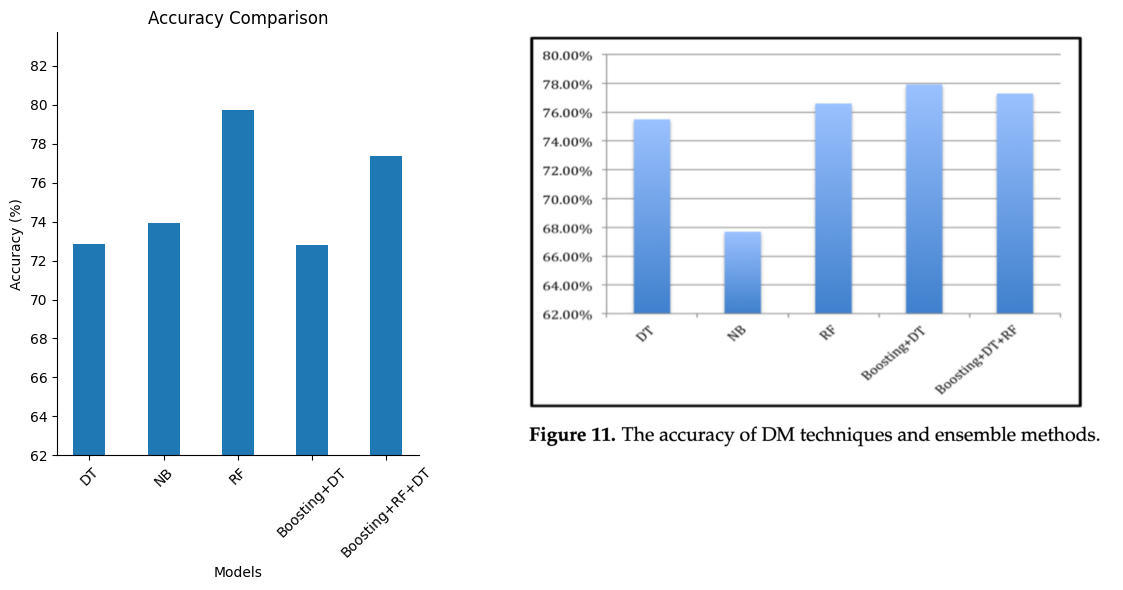

In [49]:
# Code to plot my models accuracy:

selected_models = ['DT', 'NB', 'RF', 'Boosting+DT', 'Boosting+RF+DT']
accuracies = [results[model][0] for model in selected_models]

# Load in og figure
img = mpimg.imread('images/accuracy of dm and dt ensemble.png')

# Create subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [1, 2]})

# Plot the bar chart for accuracies
ax[0].bar(selected_models, accuracies, width=0.43)
ax[0].set_title("Accuracy Comparison")
ax[0].set_xlabel("Models")
ax[0].set_ylabel("Accuracy (%)")
ax[0].set_ylim(62.00)
ax[0].set_yticks(range(62, int(max(accuracies) + 4), 2))
ax[0].tick_params(axis='x', rotation=45)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# Display the image
ax[1].imshow(img)
ax[1].axis("off")  # Turn off axes for the image

# Adjust layout and show the plot
plt.tight_layout()

My findings show something different - boosting with a decision tree actually led to slightly less accuracy than the decision tree alone. Additionally, though boosting with the decision tree and random forest yielded a higher accuracy than a decision tree alone, it was still lower than a random forest alone. In fact, the model that yielded the highest accuracy was boosting with decision trees, naive bayes, and random forests. Below, I plotted all 15 experiments accuracies, with a dashed line at y = 77% to represent the authors' original finding.

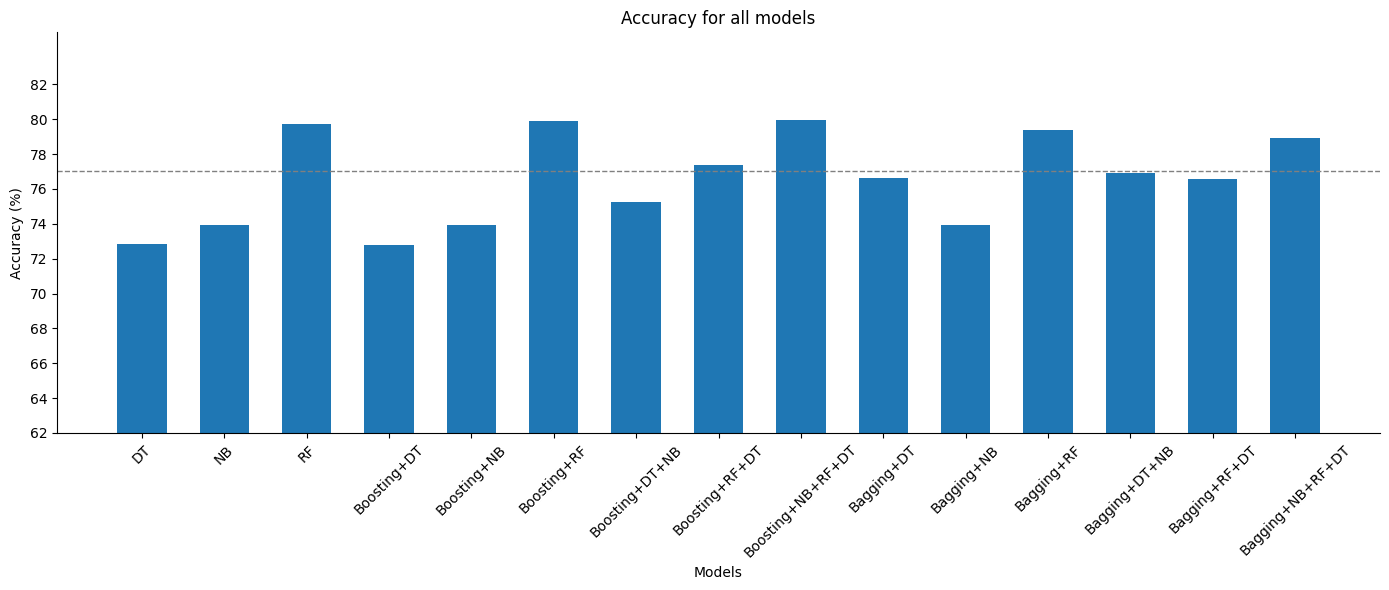

In [67]:
# Extract accuracy values
accuracy = [model[0] for model in results.values()]

# Plot the bar chart for precision
plt.figure(figsize=(14, 6)) 
plt.bar(results.keys(), accuracy, width=0.6)
plt.title("Accuracy for all models")
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.ylim(62, max(accuracy) + 5)  # Set y-axis limits

# Define custom y-ticks
plt.yticks(range(62, int(max(accuracies) + 4), 2))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Plot original finding
plt.axhline(y=77, color='gray', linestyle='--', linewidth=1)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

---

### 3. Precision

I then plotted the traditional DM models' precisions side-by-side to compare my results to those of the authors.

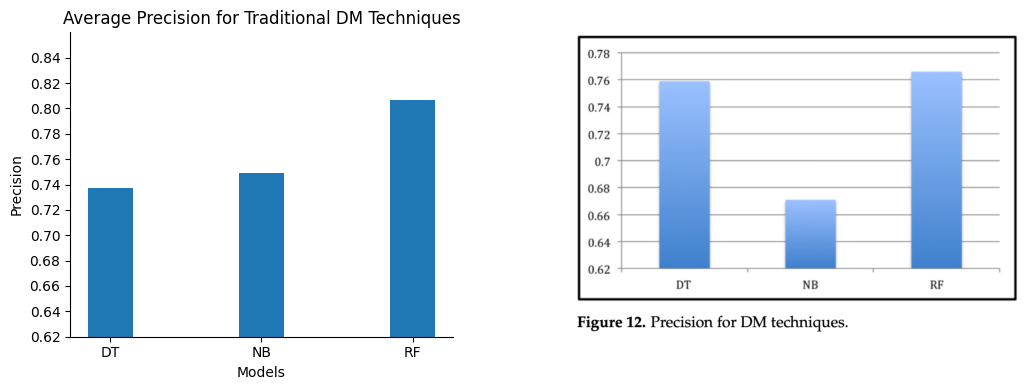

In [41]:
def frange(start, stop, step):
    while start < stop:
        yield round(start, 10)  # Avoid floating-point inaccuracies
        start += step

# Select models and their precision values
models = list(results.keys())[0:3]
precisions = [metrics[1] for metrics in results.values()][0:3]

# Load the image
img = mpimg.imread('images/precision for traditional dm techniques.png')

# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [1, 2]})

# Plotting the bar chart
ax[0].bar(models, precisions, width=0.3)
ax[0].set_ylim(0.62, round(max(precisions) + 0.05, 2))
ax[0].set_yticks([round(tick, 2) for tick in frange(0.62, round(max(precisions) + 0.04, 2), 0.02)])
ax[0].set_title('Average Precision for Traditional DM Techniques')
ax[0].set_xlabel('Models')
ax[0].set_ylabel('Precision')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# Display the image on the second subplot
ax[1].imshow(img)
ax[1].axis('off')  # Hide the axis for the image

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

The original findings are plotted on the right, mine are on the left.

Though I obtained different numerical results, the authors' finding that the random forest outperformed the other methods was reproduced in my project. Additionally, I was able to reproduce their claim that, "all fifteen experiments have a value of precision above 0.65." As evidenced by the bar plot below, all my models had a precision above 0.72. While boosting (0.808) and bagging (0.805) methods for random forest models did not noticeably improve the precision compared to the random forest alone (0.807), we see some improvements when ensemble methods are added to other models. For example, bagging added to decision trees (0.737 to 0.776) improves precision. However, I failed to reproduce the authors' findings that, "other ensemble classifiers outperformed the traditional DM techniques." While many come close the precision of a random forest alone, none surpass it.

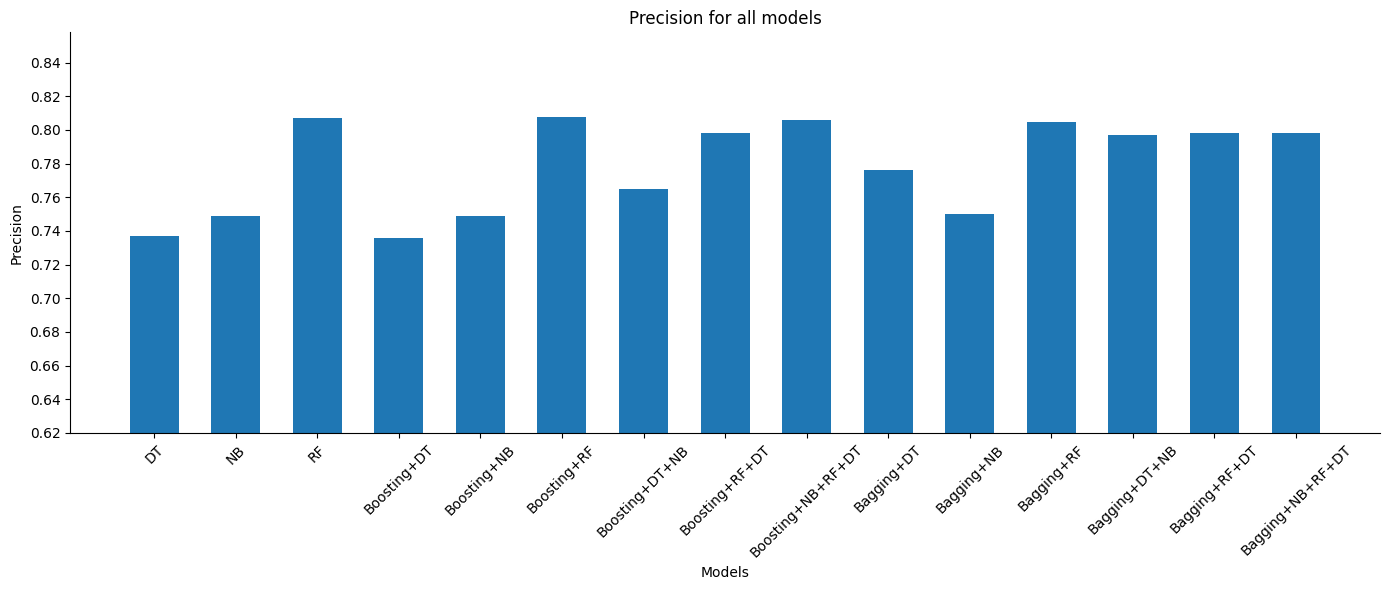

In [51]:
# Extract precision values
precision = [model[1] for model in results.values()]

# Plot the bar chart for precision
plt.figure(figsize=(14, 6)) 
plt.bar(results.keys(), precision, width=0.6)
plt.title("Precision for all models")
plt.xlabel("Models")
plt.ylabel("Precision")
plt.ylim(0.62, max(precision) + 0.05)  # Set y-axis limits

# Define custom y-ticks
plt.yticks([round(tick, 2) for tick in frange(0.62, max(precision) + 0.05, 0.02)])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

---
### 4. Recall
I then plotted the traditional DM models' precisions side-by-side to compare my results to those of the authors.

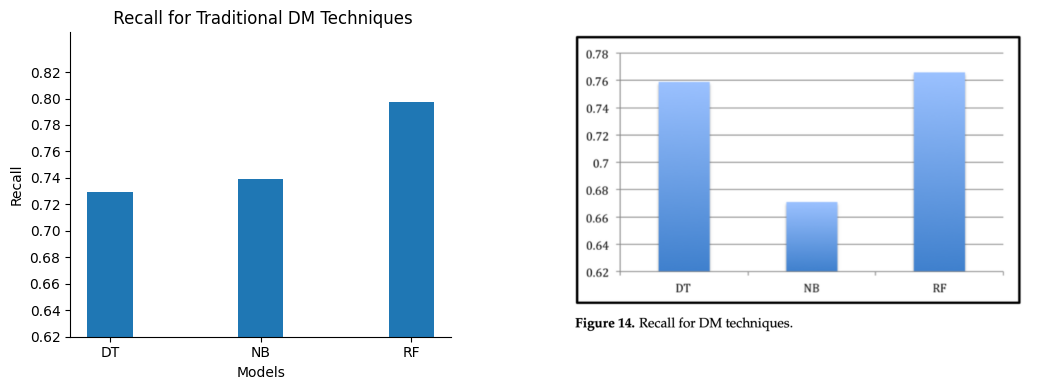

In [53]:
# Select models and their recall values
models = list(results.keys())[0:3]
recall = [metrics[2] for metrics in results.values()][0:3]

# Load the image
img = mpimg.imread('images/recall for traditional DM techniques.png')

# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [1, 2]})

# Plotting the bar chart
ax[0].bar(models, recall, width=0.3)
ax[0].set_ylim(0.62, round(max(recall) + 0.05, 2))
ax[0].set_yticks([round(tick, 2) for tick in frange(0.62, round(max(recall) + 0.04, 2), 0.02)])
ax[0].set_title(' Recall for Traditional DM Techniques')
ax[0].set_xlabel('Models')
ax[0].set_ylabel('Recall')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# Display the image on the second subplot
ax[1].imshow(img)
ax[1].axis('off')  # Hide the axis for the image

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

My results are on the left, the originals are on the right. 

Again, though I obtained different numbers, I was able to reproduce their findings that, "all fifteen experiments have a value of precision above 0.65." All my experiments yielded recall values greater than 0.72. Additionally, I also found, "compared to traditional DM techniques, random forest performed better in recall than others with a value of 0.76", though mine was 0.797. Boosting with random forests (0.799) and boosting with decision trees, naive bayes, and random forests (0.800) yielded a slightly higher precision than random forests alone. I was unable to reproduce their finding that, "Boosting with a decision tree achieved the highest value of recall" - my boosting with a decision tree yielded a recall of (0.728), amongst the lowest recalls out of all 15 experiments.

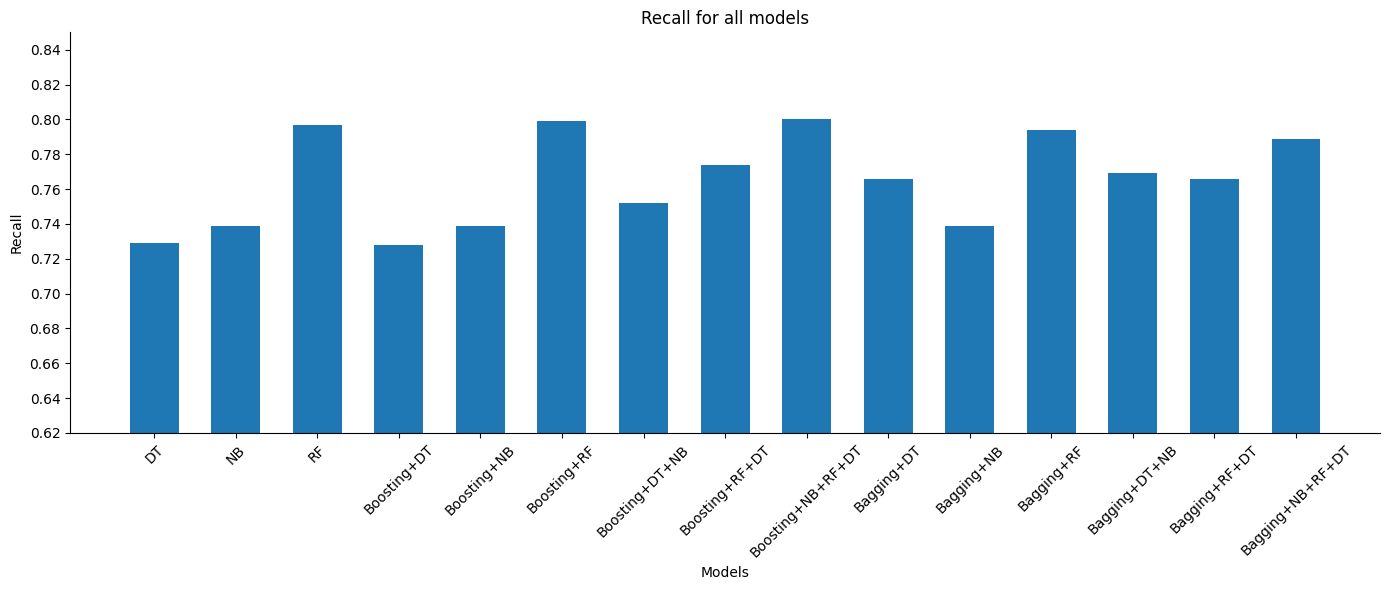

In [56]:
# Extract recall values
recall = [model[2] for model in results.values()]

# Plot the bar chart for recall
plt.figure(figsize=(14, 6)) 
plt.bar(results.keys(), recall, width=0.6)
plt.title("Recall for all models")
plt.xlabel("Models")
plt.ylabel("Recall")
plt.ylim(0.62, max(recall) + 0.05)  # Set y-axis limits

# Define custom y-ticks
plt.yticks([round(tick, 2) for tick in frange(0.62, max(recall) + 0.05, 0.02)])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

---
### 5. F-Measure

Lastly, I plotted the traditional DM models' f-measures side-by-side to compare my results to those of the authors.


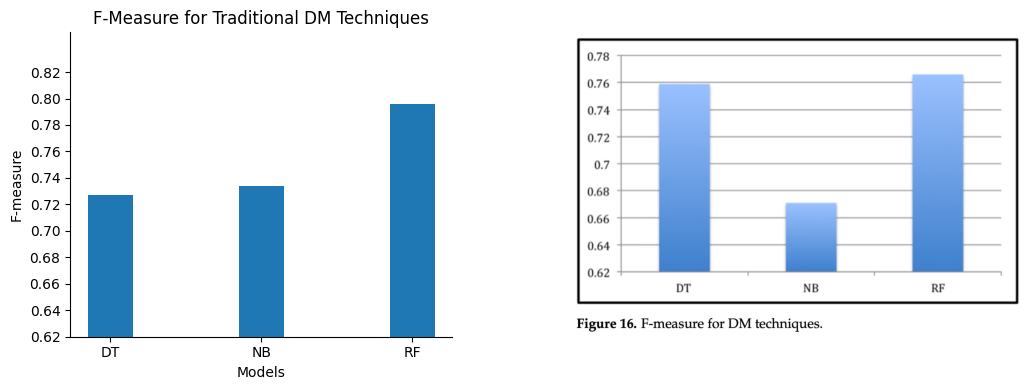

In [69]:
# Select models and their precision values
f1 = [metrics[3] for metrics in results.values()][0:3]

# Load the image
img = mpimg.imread('images/f measure for traditional DM techniques.png')

# Create subplots: 1 row, 2 columns
fig, ax = plt.subplots(1, 2, figsize=(12, 4), gridspec_kw={'width_ratios': [1, 2]})

# Plotting the bar chart
ax[0].bar(models, f1, width=0.3)
ax[0].set_ylim(0.62, round(max(f1) + 0.05, 2))
ax[0].set_yticks([round(tick, 2) for tick in frange(0.62, round(max(f1) + 0.04, 2), 0.02)])
ax[0].set_title('F-Measure for Traditional DM Techniques')
ax[0].set_xlabel('Models')
ax[0].set_ylabel('F-measure')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# Display the image on the second subplot
ax[1].imshow(img)
ax[1].axis('off')  # Hide the axis for the image

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

Similarly to all previous measures, I was able to reproduce their finding that all fifteen experiments have a f-measure  above 0.65 with the random forest out performing the remaining traditional models; all my experiments had a f-measure value above 0.72, and my random forest had the highest f-measure (0.796). I was unable to reproduce their finding that boosting with a decision tree recorded the highest value of precision with 0.78 - I found that boosting with a random forest yielded a f-measure of 0.798, and boosting with all three models yielded a f-measure of 0.799. Again, these are only slightly higher than the random forest alone.

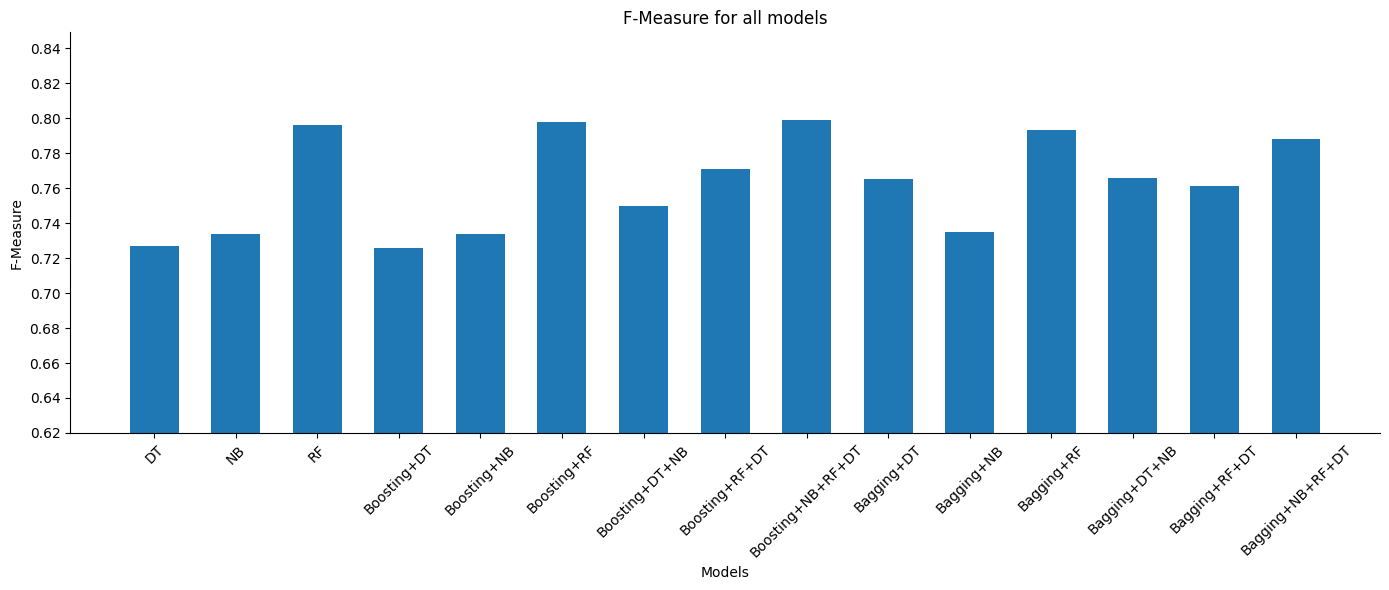

In [58]:
# Extract f1 values
f1 = [model[3] for model in results.values()]

# Plot the bar chart for precision
plt.figure(figsize=(14, 6)) 
plt.bar(results.keys(), f1, width=0.6)
plt.title("F-Measure for all models")
plt.xlabel("Models")
plt.ylabel("F-Measure")
plt.ylim(0.62, max(f1) + 0.05)  # Set y-axis limits

# Define custom y-ticks
plt.yticks([round(tick, 2) for tick in frange(0.62, max(f1) + 0.05, 0.02)])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

---
## Discussion

### Summary of Replication Attempt

To summarize, the original authors reported "improved accuracy from 0.75 to 0.77 when we used the DT method with boosting, which resulted in a more accurate prediction of student performance." However, I was unable to reproduce their findings. Across 15 experiments, I found that boosting with decision trees, Naïve Bayes, and random forests yielded the most accurate predictions of student performance (0.7998). Interestingly, this combination of ensemble and data mining techniques was only marginally better than random forests alone (0.7973). This raises the question of whether a 0.25% increase in accuracy—achieved with a considerably higher computational cost—is justified.


### Commentary

While the reasons for the differing results are uncertain, I hypothesize several contributing factors. First, as discussed in the Methods section, the original paper used WEKA software, whereas I opted to use Python's scikit-learn package to enhance my understanding and experience with machine learning techniques. Although scikit-learn offers decision tree, Naïve Bayes, and random forest classifiers along with boosting, bagging, and voting ensemble methods, differences in software implementations might have influenced the outcomes. Moreover, the original authors did not specify any parameters they used in WEKA, so my experiments similarly omitted parameter tuning.

To ensure reproducibility, I set a fixed random state (`random_state = 12345`) for all my models. However, the original paper did not mention whether a specific random state was used in WEKA, which could explain some variations in results.

Additionally, a discrepancy in the original methodology may have contributed to the divergence. The authors stated that they performed boosting/bagging with Naïve Bayes and random forests. However, their tables and analyses were labeled as boosting/bagging with Naïve Bayes and decision trees. Due to this inconsistency and lack of clarification, I chose to run boosting/bagging with Naïve Bayes and decision trees. If the authors actually used random forests in these experiments, this could account for the differences in findings.

Lastly, the authors did not mention whether they transformed their data into numerical formats. This step was necessary in my experiments to avoid errors when running classifier models. The absence of information on how WEKA handled non-numerical data adds another layer of uncertainty, as my data preprocessing may have introduced variations.

### Final Reflections

Overall, this project provides insight into why exploring various models and using various metrics of model success are important. Arguably, the claim that ensemble methods and combining models together always yield a better, more accurate model isn't necessary true. In fact, just a random forest alone performs quite comparably to added ensemble methods and a combination machine learning techniques. That is not to say that ensemble methods cannot improve a model's performance (the difference between a decision tree alone vs. bagging with decision trees can clearly be seen in this project), but, in instances where it is comptuationally feasible, one should run a variety of models to see which would yield the best predictions for a given dataset, for a given problem. 

Furthermore, the project demonstrates the importance of fully and clearly documenting one's work. The majority of issues listed that could have contributed to the differing results could have been resolved if the authors had transparently documented their work in their paper. It also highlights that it is possible to build these sorts of predictive models for education. Future research can potentially apply these modeling methods on different data sets with different populations to see if their predictive power still holds, or even rerun this same code with a variety of random states to see if/how the best model changes as a result.

---